<h1>Table of Contents: ggplot &amp; Altair<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#'In'-plot-interactivity-using-Altair" data-toc-modified-id="'In'-plot-interactivity-using-Altair-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>'In' plot interactivity using Altair</a></span></li><li><span><a href="#Ipywidgets-and-Seaborn" data-toc-modified-id="Ipywidgets-and-Seaborn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ipywidgets and Seaborn</a></span><ul class="toc-item"><li><span><a href="#The-widget-list" data-toc-modified-id="The-widget-list-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The widget list</a></span></li></ul></li><li><span><a href="#Dashboard" data-toc-modified-id="Dashboard-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dashboard</a></span></li></ul></div>

# 'In' plot interactivity using Altair

In [1]:
import altair as alt
from plotnine.data import midwest

In [2]:
IL = midwest[midwest['state'] == 'IL']

In [3]:
alt.Chart(IL).mark_point(filled=True).encode(
    alt.X('percollege'), # percent college
    alt.Y('percprof'),  # percent professional
    alt.Size('poptotal'),
    alt.Color('popdensity'),
    alt.OpacityValue(0.7),
        tooltip = [alt.Tooltip('county'),
               alt.Tooltip('percwhite'),
               alt.Tooltip('percblack'),
               alt.Tooltip('percother')
              ]
)

alt.Chart(...)

In [4]:
x =alt.Chart(IL).mark_point(filled=True).encode(
    alt.X('percollege'), # percent college
    alt.Y('percprof'),  # percent professional
    alt.Size('poptotal'),
    alt.Color('popdensity'),
    alt.OpacityValue(0.7),
        tooltip = [alt.Tooltip('county'),
               alt.Tooltip('percwhite'),
               alt.Tooltip('percblack'),
               alt.Tooltip('percother')
              ]
).interactive()

x

alt.Chart(...)

# Ipywidgets and Seaborn

In [6]:
import ipywidgets as widgets

In [7]:
widgets.IntSlider()

IntSlider(value=0)

In [8]:
w = widgets.IntSlider()

In [9]:
from IPython.display import display

In [10]:
display(w)

IntSlider(value=0)

In [11]:
# Widgets have properties
w.value

0

In [12]:
widgets.IntSlider(step=2, description='Number: ')

IntSlider(value=0, description='Number: ', step=2)

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = {
    'apples': [32, 22, 20, 31,33,43,21,56,23,43], 
    'oranges': [0, 3, 7, 2,5,7,5,9,8,2]
}
sales = pd.DataFrame(data)


def bandwidth_widget(bw=1):
    sns.kdeplot(sales.apples, lw=3, fill=True, bw_adjust=bw)
    plt.xlim(0, 60)
    plt.ylim(0, 0.07);

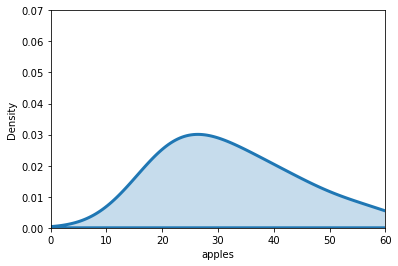

In [14]:
# .interact automatically creates user interface (UI) controls for exploring code 
# and data interactively. It is the easiest way to get started using IPython’s widgets.
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html?highlight=interact#Basic-interact

widgets.interact(bandwidth_widget, bw=(.1, 3));

In [15]:
def kde_widget(fill=True, color='blue'):
    sns.kdeplot(sales.apples, color=color, lw=3, fill=fill)
    plt.xlim(0, 60)
    plt.ylim(0, 0.04);

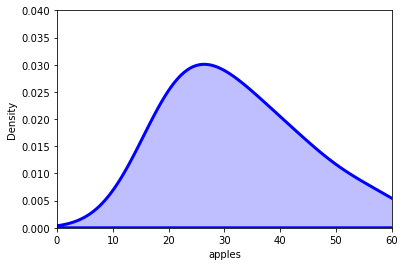

In [16]:
widgets.interact(kde_widget, 
                 fill=True,
                 color=['blue', 'red', 'green', 'orange']
                 );

## The widget list

https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

# Dashboard 

This dashboard is run 'inline' meaning is output is included as part of the notebook.  Access to an external server is required to run 'external'.


In [2]:
# !pip install jupyter_dash

In [21]:
# Uses a slider to control the year of the chart
from jupyter_dash import JupyterDash 
from dash.dependencies import Output, Input
from dash import no_update
from dash import dcc   
from dash import html


import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px

diabetes = pd.read_csv('https://bitbucket.org/jimcody/sampledata/raw/b2aa6df015816ec35afc482b53df1b7ca7a31f80/diabetes_for_plotly.csv')
diabetes['gender'] = diabetes['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female', 
                                                 'female':'Female', 'male':'Male', 
                                                 '?':'Female', 'Unknown/Invalid':'Female'})

d_month = diabetes.groupby(['year','month']).sum().reset_index()
d_month = d_month.sort_values(['year','month'])

fig5 = px.line(d_month,x='month', y='num_medications')

####### Build the App. ##################
app = JupyterDash(__name__) 

app.layout = html.Div([
    dcc.Graph(id='x', figure = fig5),
    dcc.Slider(
        id='year-slider',
        min=d_month['year'].min(),
        max=d_month['year'].max(),
        value=d_month['year'].min(),
        marks={str(year): str(year) for year in d_month['year'].unique()},
        step=None
    )
])
@app.callback(
    Output('x', 'figure'),
    Input('year-slider', 'value'))

def update_figure(selected_year):
    d_year = d_month[d_month.year == selected_year]
    
    fig5 = px.line(d_year,x='month', y='num_medications')


    fig5.update_layout(transition_duration=500)

    return fig5

app.run_server(mode='inline')